In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [ ]:
# position above averages
# consecutive weeks where goes above/below porjected - scale

In [31]:
team_stats = pd.read_csv('/Users/benstager/Desktop/fantasy/data/team_stats_by_position.csv')
team_scoring = pd.read_csv('/Users/benstager/Desktop/fantasy/data/scoreboard.csv')
team_pivot_scoring = pd.read_csv('/Users/benstager/Desktop/fantasy/data/scoreboard_pivot.csv')
PR = pd.read_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv')
PR = PR.drop(PR.columns[0], axis=1)

In [3]:
weeks = [1, 2, 3, 4]

current_year_stats = team_stats[(team_stats['year'] == 2025) & (team_stats['week'].isin(weeks))]
current_year_stats['diff'] = current_year_stats['player_scored'] - current_year_stats['player_projected']
current_year_scoring = team_scoring[(team_scoring['year'] == 2025) & (team_scoring['week'].isin(weeks))]
current_week_pivot_scoring = team_pivot_scoring[(team_pivot_scoring['year'] == 2025) & (team_pivot_scoring['week'] == max(weeks))]
current_year_pivot_scoring = team_pivot_scoring[(team_pivot_scoring['year'] == 2025) & (team_pivot_scoring['week'].isin(weeks))]
grouped = current_year_pivot_scoring.groupby('team').agg({'score':'mean', 'projected':'mean', 'allowed':'mean'})
grouped_current_weeks = current_week_pivot_scoring.groupby('team').agg({'score':'mean', 'projected':'mean', 'allowed':'mean'})
grouped['diff'] = grouped['score'] - grouped['projected']

diffs = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'diff':'mean'}).reset_index()
diffs_grouped_min = diffs.groupby('team')['diff'].idxmin()
diffs_grouped_max = diffs.groupby('team')['diff'].idxmax()

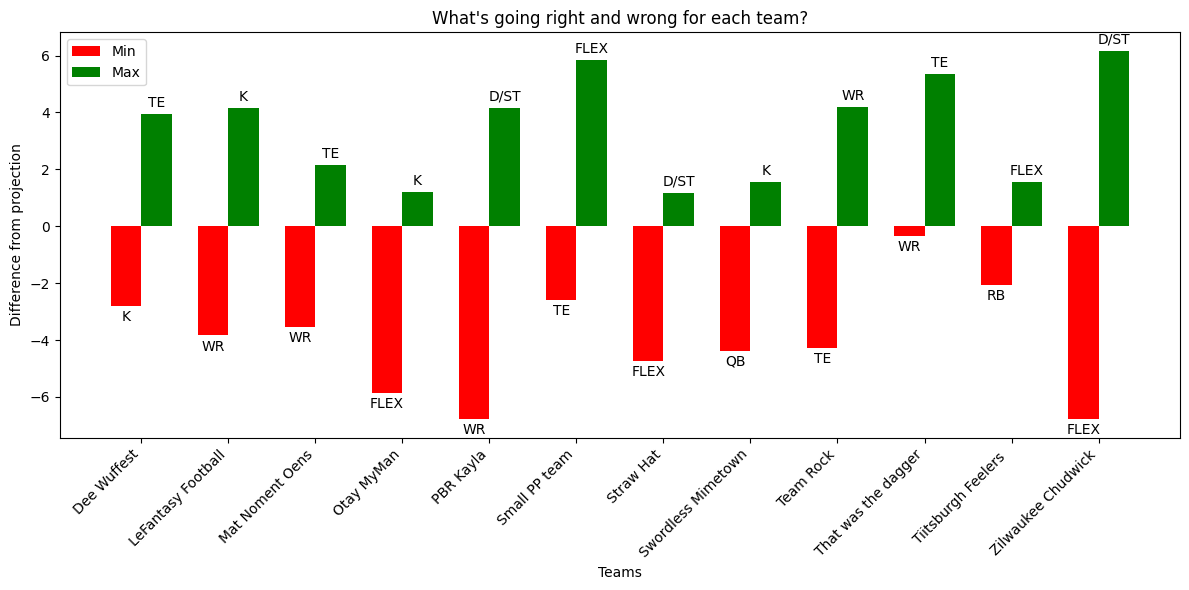

In [4]:
diffs.loc[diffs_grouped_min.values]
diffs.loc[diffs_grouped_max.values]
# Create a bar chart with two bars per team
teams = diffs['team'].unique()
min_values = diffs.loc[diffs_grouped_min.values]['diff'].values
max_values = diffs.loc[diffs_grouped_max.values]['diff'].values
min_positions = diffs.loc[diffs_grouped_min.values]['started_nonstarted'].values
max_positions = diffs.loc[diffs_grouped_max.values]['started_nonstarted'].values

x = np.arange(len(teams))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, min_values, width, label='Min', color='red')
bars2 = ax.bar(x + width/2, max_values, width, label='Max', color='green')

# Add labels, title, and legend
ax.set_xlabel('Teams')
ax.set_ylabel('Difference from projection')
ax.set_title("What's going right and wrong for each team?")
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.legend()

# Add labels to each bar
ax.bar_label(bars1, labels=min_positions, padding=3, fontsize=10)
ax.bar_label(bars2, labels=max_positions, padding=3, fontsize=10)

plt.tight_layout()
plt.show()

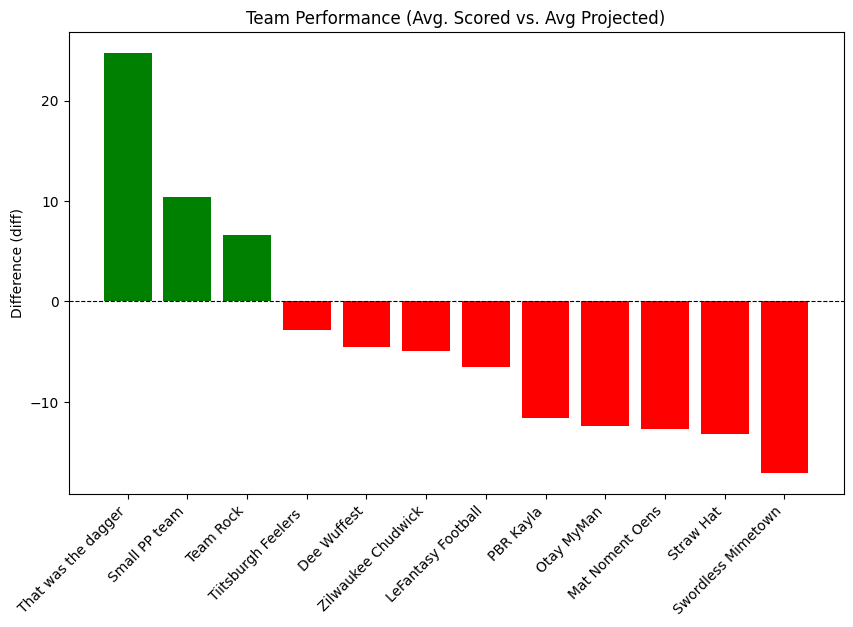

In [5]:
grouped_sorted = grouped.sort_values('diff', ascending=False)
plt.figure(figsize=(10, 6))
colors = ['green' if val > 0 else 'red' for val in grouped_sorted['diff']]
plt.bar(grouped_sorted.index, grouped_sorted['diff'], color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Difference (diff)')
plt.title('Team Performance (Avg. Scored vs. Avg Projected)')
plt.show()

Text(0.5, 1.0, 'through week 4')

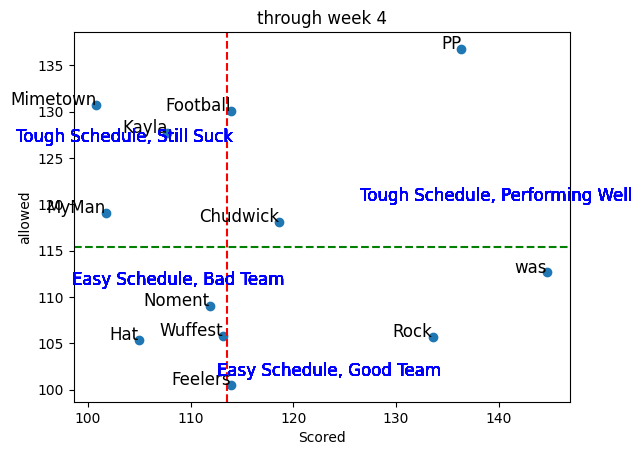

In [6]:
plt.scatter(grouped['score'], grouped['allowed'])
plt.axvline(x=grouped['score'].median(), color='r', linestyle='--')
plt.axhline(y=grouped['allowed'].median(), color='g', linestyle='--')
plt.xlabel('Scored')
plt.ylabel('allowed')


# Add labels to each point
for i, team in enumerate(grouped.index):
    plt.text(grouped['score'][i], grouped['allowed'][i], team.split(' ')[1], fontsize=12, ha='right')
    # Label each quadrantx
    plt.text(grouped['score'].median() - 10, grouped['allowed'].max() - 10, 'Tough Schedule, Still Suck', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].median() + 10, grouped['allowed'].min() + 1, 'Easy Schedule, Good Team', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].min() + 8, grouped['allowed'].median() - 4, 'Easy Schedule, Bad Team', color='blue', fontsize=12, ha='center')
    plt.text(grouped['score'].max() - 5, grouped['allowed'].median() + 5, 'Tough Schedule, Performing Well', color='blue', fontsize=12, ha='center')

plt.title(f"through week {max(weeks)}")

In [80]:
grouped_current_weeks

,score,projected,allowed
team,,,
Dee Wuffest,92.70,117.08,96.82
LeFantasy Football,115.96,111.77,157.24
Mat Noment Oens,109.48,111.49,110.82
Otay MyMan,100.04,99.25,122.46
PBR Kayla,96.82,121.02,92.70
Small PP team,138.80,129.41,165.68
Straw Hat,110.82,112.44,109.48
Swordless Mimetown,99.78,121.01,157.38
Team Rock,157.38,130.80,99.78


Text(0.5, 1.0, 'in week 4')

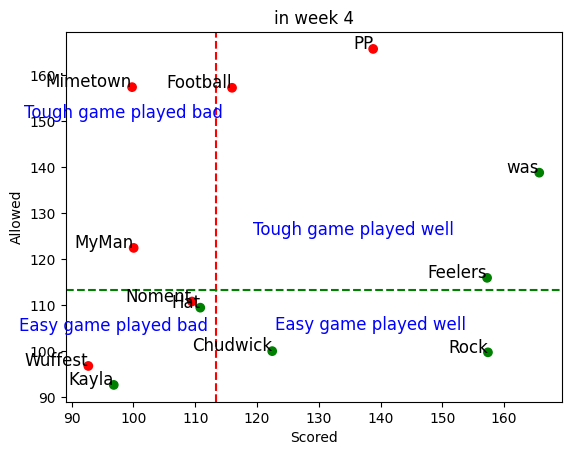

In [90]:
plt.scatter(grouped_current_weeks['score'], grouped_current_weeks['allowed'], 
            c=['green' if score > allowed else 'red' 
               for score, allowed in zip(grouped_current_weeks['score'], grouped_current_weeks['allowed'])])

plt.axvline(x=grouped_current_weeks['score'].median(), color='r', linestyle='--')
plt.axhline(y=grouped_current_weeks['allowed'].median(), color='g', linestyle='--')
plt.xlabel('Scored')
plt.ylabel('Allowed')

# Add labels to each point
for i, team in enumerate(grouped_current_weeks.index):
    plt.text(grouped_current_weeks['score'][i], grouped_current_weeks['allowed'][i], team.split(' ')[1], fontsize=12, ha='right')

# Label each quadrant
plt.text(grouped_current_weeks['score'].median() - 15, grouped_current_weeks['allowed'].max() - 15, 'Tough game played bad', color='blue', fontsize=12, ha='center')
plt.text(grouped_current_weeks['score'].median() + 25, grouped_current_weeks['allowed'].min() + 12, 'Easy game played well', color='blue', fontsize=12, ha='center')
plt.text(grouped_current_weeks['score'].min() + 4, grouped_current_weeks['allowed'].median() - 9, 'Easy game played bad', color='blue', fontsize=12, ha='center')
plt.text(grouped_current_weeks['score'].max() - 30, grouped_current_weeks['allowed'].median() + 12, 'Tough game played well', color='blue', fontsize=12, ha='center')

plt.title(f"in week {max(weeks)}")

In [8]:
team_pivot_scoring[(team_pivot_scoring['week'] == 4) & (team_pivot_scoring['year'] == 2025)]

,Unnamed: 0,year,week,home_away,team,team_first_name,score,projected,allowed,wins,losses,wl_pct,standing
372,0,2025,4,home,Tiitsburgh Feelers,Gavin,157.24,121.23,115.96,3,1,0.75,3
373,0,2025,4,away,LeFantasy Football,Ethan,115.96,111.77,157.24,0,4,0.00,10
374,0,2025,4,home,Mat Noment Oens,Harry,109.48,111.49,110.82,2,2,0.50,6
375,0,2025,4,away,Straw Hat,Cash,110.82,112.44,109.48,2,2,0.50,7
376,0,2025,4,home,PBR Kayla,Stager,96.82,121.02,92.70,1,3,0.25,8
377,0,2025,4,away,Dee Wuffest,Jake,92.70,117.08,96.82,3,1,0.75,4
378,0,2025,4,home,Team Rock,Calvin,157.38,130.80,99.78,3,1,0.75,1
379,0,2025,4,away,Swordless Mimetown,Hayden,99.78,121.01,157.38,0,4,0.00,11
380,0,2025,4,home,That was the dagger,DC,165.68,121.81,138.80,4,0,1.00,0
381,0,2025,4,away,Small PP team,Greenberg,138.80,129.41,165.68,2,2,0.50,5


In [9]:
grouped.sort_values('score', ascending=False)

,score,projected,allowed,diff
team,,,,
That was the dagger,144.715,120.0000,112.645,24.7150
Small PP team,136.340,125.9825,136.780,10.3575
Team Rock,133.555,126.9850,105.640,6.5700
Zilwaukee Chudwick,118.590,123.4875,118.075,-4.8975
Tiitsburgh Feelers,113.980,116.8250,100.495,-2.8450
LeFantasy Football,113.890,120.4625,130.080,-6.5725
Dee Wuffest,113.165,117.7525,105.765,-4.5875
Mat Noment Oens,111.865,124.5450,109.060,-12.6800
PBR Kayla,107.755,119.3325,127.715,-11.5775


In [10]:
grouped.sort_values('allowed', ascending=False)

,score,projected,allowed,diff
team,,,,
Small PP team,136.340,125.9825,136.780,10.3575
Swordless Mimetown,100.820,117.9150,130.715,-17.0950
LeFantasy Football,113.890,120.4625,130.080,-6.5725
PBR Kayla,107.755,119.3325,127.715,-11.5775
Otay MyMan,101.735,114.1075,119.080,-12.3725
Zilwaukee Chudwick,118.590,123.4875,118.075,-4.8975
That was the dagger,144.715,120.0000,112.645,24.7150
Mat Noment Oens,111.865,124.5450,109.060,-12.6800
Dee Wuffest,113.165,117.7525,105.765,-4.5875


In [75]:
grouped.sort_values('projected', ascending=False)

,score,projected,allowed,diff
team,,,,
Team Rock,133.555,126.9850,105.640,6.5700
Small PP team,136.340,125.9825,136.780,10.3575
Mat Noment Oens,111.865,124.5450,109.060,-12.6800
Zilwaukee Chudwick,118.590,123.4875,118.075,-4.8975
LeFantasy Football,113.890,120.4625,130.080,-6.5725
That was the dagger,144.715,120.0000,112.645,24.7150
PBR Kayla,107.755,119.3325,127.715,-11.5775
Straw Hat,104.980,118.1925,105.340,-13.2125
Swordless Mimetown,100.820,117.9150,130.715,-17.0950


Text(0.5, 1.0, 'through week 4')

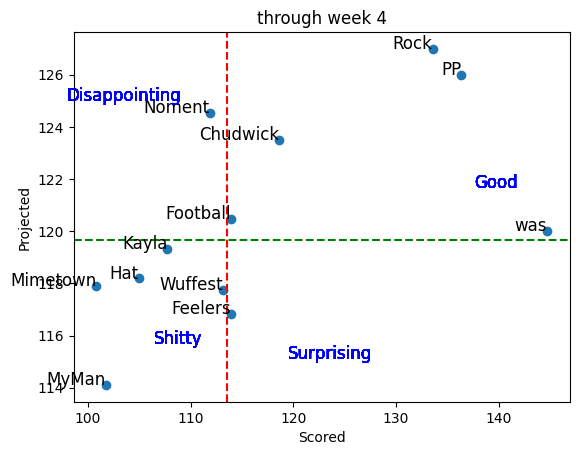

In [11]:
scored = grouped['score']
projected = grouped['projected']

scored_cent = scored.median()
projected_cent = projected.median()

plt.scatter(scored, projected)
plt.axvline(x=scored_cent, color='r', linestyle='--')
plt.axhline(y=projected_cent, color='g', linestyle='--')
plt.xlabel('Scored')
plt.ylabel('Projected')


# Add labels to each point
for i, team in enumerate(grouped.index):
    plt.text(scored[i], projected[i], team.split(' ')[1], fontsize=12, ha='right')
    # Label each quadrantx
    plt.text(scored_cent - 10, projected.max() - 2, 'Disappointing', color='blue', fontsize=12, ha='center')
    plt.text(scored_cent + 10, projected.min() + 1, 'Surprising', color='blue', fontsize=12, ha='center')
    plt.text(scored.min() + 8, projected_cent - 4, 'Shitty', color='blue', fontsize=12, ha='center')
    plt.text(scored.max() - 5, projected_cent + 2, 'Good', color='blue', fontsize=12, ha='center')

plt.title(f"through week {max(weeks)}")

In [30]:
pd.read_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv')

,Week,#1,#2,#3,#4,#5,#6,#7,#8,#9,#10,#11,#12
0,1,Zilwaukee Chudwick,Dee Wuffest,LeFantasy Fo,Team Rock,That was the dagger,Small PP Team,Tittsburgh Feelers,Otay Myman,Mat Noment Oens,PBR Kayla,Swordless Mimetown,Straw Hat
1,2,That was the dagger,Zilwaukee Chudwick,Dee Wuffest,Small PP Team,Team Rock,Straw Hat,Mat Noment Oens,Otay MyMan,LeFantasy Football,Tittsburgh Feelers,Swordless Mimetown,PBR Kayla
2,4,That was the dagger,Zilwaukee Chudwick,Dee Wuffest,Small PP Team,Team Rock,Straw Hat,Mat Noment Oens,Otay MyMan,LeFantasy Football,Tittsburgh Feelers,Swordless Mimetown,PBR Kayla
3,3,That was the dagger,Zilwaukee Chudwick,Dee Wuffest,Small PP Team,Team Rock,Straw Hat,Mat Noment Oens,Otay MyMan,LeFantasy Football,Tittsburgh Feelers,Swordless Mimetown,PBR Kayla
4,3,That was the dagger,Zilwaukee Chudwick,Dee Wuffest,Small PP Team,Team Rock,Straw Hat,Mat Noment Oens,Otay MyMan,LeFantasy Football,Tittsburgh Feelers,Swordless Mimetown,PBR Kayla


In [29]:
new_slots = ['That was the dagger',
'Zilwaukee Chudwick',
'Dee Wuffest',
'Small PP Team',
'Team Rock',
'Straw Hat',
'Mat Noment Oens',
'Otay MyMan',
'LeFantasy Football',
'Tittsburgh Feelers',
'Swordless Mimetown',
'PBR Kayla']

cols = ['Week']
[cols.extend(f'#{i}' for i in range(1,13))]

vals = [3] + new_slots

final = pd.DataFrame({i:j for i,j in zip(cols, vals)},index=[0])

pd.concat([PR, final]).to_csv('/Users/benstager/Desktop/fantasy/data/SPR.csv', index=False)

In [35]:
current_year_pivot_scoring[current_year_pivot_scoring['team'] == 'That was the dagger']

,Unnamed: 0,year,week,home_away,team,team_first_name,score,projected,allowed,wins,losses,wl_pct,standing
344,0,2025,1,home,That was the dagger,DC,118.08,121.36,105.76,4,0,1.0,0
359,0,2025,2,away,That was the dagger,DC,138.68,117.21,107.60,4,0,1.0,0
371,0,2025,3,away,That was the dagger,DC,156.42,119.62,98.42,4,0,1.0,0
380,0,2025,4,home,That was the dagger,DC,165.68,121.81,138.80,4,0,1.0,0


In [14]:
current_year_scoring[current_year_scoring['week'] == 4]

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner
186,0,2025,4,Tiitsburgh Feelers,Gavin,157.24,121.23,LeFantasy Football,Ethan,115.96,111.77,Team(Tiitsburgh Feelers )
187,0,2025,4,Mat Noment Oens,Harry,109.48,111.49,Straw Hat,Cash,110.82,112.44,Team(Straw Hat)
188,0,2025,4,PBR Kayla,Stager,96.82,121.02,Dee Wuffest,Jake,92.70,117.08,Team(PBR Kayla)
189,0,2025,4,Team Rock,Calvin,157.38,130.80,Swordless Mimetown,Hayden,99.78,121.01,Team(Team Rock)
190,0,2025,4,That was the dagger,DC,165.68,121.81,Small PP team,Greenberg,138.80,129.41,Team(That was the dagger)
191,0,2025,4,Zilwaukee Chudwick,Chad,122.46,121.78,Otay MyMan,Cawley,100.04,99.25,Team(Zilwaukee Chudwick)


In [16]:
team_stats

,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
0,0,1,home,Swordless Mimetown,Cooper Kupp,0.00,0.00,WR,IR,2023,Hayden
1,1,1,home,Swordless Mimetown,Amon-Ra St. Brown,19.10,0.00,WR,WR,2023,Hayden
2,2,1,home,Swordless Mimetown,Patrick Mahomes,19.54,0.00,QB,QB,2023,Hayden
3,3,1,home,Swordless Mimetown,Dameon Pierce,6.70,0.00,RB,RB,2023,Hayden
4,4,1,home,Swordless Mimetown,James Conner,12.00,0.00,RB,RB,2023,Hayden
...,...,...,...,...,...,...,...,...,...,...,...
8242,12,14,away,Otay MyMan,Tre Tucker,0.00,10.43,WR,BE,2025,Cawley
8243,13,14,away,Otay MyMan,T.J. Hockenson,0.00,9.07,TE,TE,2025,Cawley
8244,14,14,away,Otay MyMan,D'Andre Swift,0.00,0.00,RB,RB,2025,Cawley
8245,15,14,away,Otay MyMan,Kenneth Gainwell,0.00,0.00,RB,BE,2025,Cawley


In [40]:
for team in teams:
    display(team_stats[(team_stats['team'] == team) & (team_stats['week'] == 4) & (team_stats['year'] == 2025)].sort_values('started_nonstarted', ascending=False))

,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6172,0,4,away,Dee Wuffest,Amon-Ra St. Brown,26.00,17.41,WR,WR,2025,Jake
6176,4,4,away,Dee Wuffest,DeVonta Smith,4.90,11.80,WR,WR,2025,Jake
6180,8,4,away,Dee Wuffest,Dalton Kincaid,9.80,9.15,TE,TE,2025,Jake
6173,1,4,away,Dee Wuffest,Derrick Henry,7.80,16.85,RB,RB,2025,Jake
6174,2,4,away,Dee Wuffest,Chuba Hubbard,9.90,13.50,RB,RB,2025,Jake
6178,6,4,away,Dee Wuffest,Patrick Mahomes,27.30,19.30,QB,QB,2025,Jake
6186,14,4,away,Dee Wuffest,Evan McPherson,3.00,7.25,K,K,2025,Jake
6179,7,4,away,Dee Wuffest,Chris Olave,9.00,15.09,WR,FLEX,2025,Jake
6187,15,4,away,Dee Wuffest,Packers D/ST,-5.00,6.73,D/ST,D/ST,2025,Jake
6175,3,4,away,Dee Wuffest,Terry McLaurin,0.00,0.00,WR,BE,2025,Jake


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6109,3,4,away,LeFantasy Football,Marvin Harrison Jr.,18.60,11.31,WR,WR,2025,Ethan
6113,7,4,away,LeFantasy Football,Jakobi Meyers,7.00,14.96,WR,WR,2025,Ethan
6112,6,4,away,LeFantasy Football,Mark Andrews,10.00,9.19,TE,TE,2025,Ethan
6108,2,4,away,LeFantasy Football,Alvin Kamara,11.20,14.17,RB,RB,2025,Ethan
6115,9,4,away,LeFantasy Football,Travis Etienne Jr.,19.50,11.07,RB,RB,2025,Ethan
6107,1,4,away,LeFantasy Football,Josh Allen,24.86,22.67,QB,QB,2025,Ethan
6114,8,4,away,LeFantasy Football,Brandon Aubrey,8.00,8.02,K,K,2025,Ethan
6110,4,4,away,LeFantasy Football,DJ Moore,7.80,12.83,WR,FLEX,2025,Ethan
6117,11,4,away,LeFantasy Football,Steelers D/ST,9.00,7.55,D/ST,D/ST,2025,Ethan
6106,0,4,away,LeFantasy Football,CeeDee Lamb,0.00,0.00,WR,BE,2025,Ethan


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6125,3,4,home,Mat Noment Oens,Xavier Worthy,17.10,12.03,WR,WR,2025,Harry
6128,6,4,home,Mat Noment Oens,Rome Odunze,16.90,15.43,WR,WR,2025,Harry
6130,8,4,home,Mat Noment Oens,Tucker Kraft,10.60,11.86,TE,TE,2025,Harry
6122,0,4,home,Mat Noment Oens,Bijan Robinson,28.10,19.76,RB,RB,2025,Harry
6127,5,4,home,Mat Noment Oens,Jaylen Warren,0.00,0.00,RB,RB,2025,Harry
6124,2,4,home,Mat Noment Oens,Lamar Jackson,10.68,22.76,QB,QB,2025,Harry
6136,14,4,home,Mat Noment Oens,Tyler Loop,9.00,8.51,K,K,2025,Harry
6123,1,4,home,Mat Noment Oens,Chase Brown,10.10,13.98,RB,FLEX,2025,Harry
6135,13,4,home,Mat Noment Oens,Bills D/ST,7.00,7.16,D/ST,D/ST,2025,Harry
6126,4,4,home,Mat Noment Oens,Mike Evans,0.00,0.00,WR,BE,2025,Harry


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6270,0,4,away,Otay MyMan,Justin Jefferson,22.60,16.68,WR,WR,2025,Cawley
6271,1,4,away,Otay MyMan,Nico Collins,11.90,17.79,WR,WR,2025,Cawley
6283,13,4,away,Otay MyMan,T.J. Hockenson,7.90,10.12,TE,TE,2025,Cawley
6284,14,4,away,Otay MyMan,D'Andre Swift,16.00,15.22,RB,RB,2025,Cawley
6273,3,4,away,Otay MyMan,David Montgomery,1.20,12.27,RB,RB,2025,Cawley
6286,16,4,away,Otay MyMan,Marcus Mariota,16.24,0.00,QB,QB,2025,Cawley
6280,10,4,away,Otay MyMan,Cam Little,8.00,7.86,K,K,2025,Cawley
6275,5,4,away,Otay MyMan,Aaron Jones Sr.,0.00,0.00,RB,IR,2025,Cawley
6272,2,4,away,Otay MyMan,Tee Higgins,6.20,11.40,WR,FLEX,2025,Cawley
6279,9,4,away,Otay MyMan,Broncos D/ST,10.00,7.91,D/ST,D/ST,2025,Cawley


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6155,0,4,home,PBR Kayla,Brian Thomas Jr.,10.60,14.66,WR,WR,2025,Stager
6156,1,4,home,PBR Kayla,A.J. Brown,2.70,15.08,WR,WR,2025,Stager
6162,7,4,home,PBR Kayla,Tyler Warren,18.30,11.95,TE,TE,2025,Stager
6161,6,4,home,PBR Kayla,J.K. Dobbins,11.50,16.14,RB,RB,2025,Stager
6158,3,4,home,PBR Kayla,Kenneth Walker III,12.00,12.73,RB,RB,2025,Stager
6163,8,4,home,PBR Kayla,Justin Herbert,12.52,18.62,QB,QB,2025,Stager
6168,13,4,home,PBR Kayla,Cameron Dicker,5.00,8.68,K,K,2025,Stager
6165,10,4,home,PBR Kayla,Najee Harris,0.00,0.00,RB,IR,2025,Stager
6157,2,4,home,PBR Kayla,Garrett Wilson,20.20,15.66,WR,FLEX,2025,Stager
6167,12,4,home,PBR Kayla,Vikings D/ST,4.00,7.50,D/ST,D/ST,2025,Stager


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6239,2,4,away,Small PP team,Tyreek Hill,12.7,14.72,WR,WR,2025,Greenberg
6245,8,4,away,Small PP team,Keenan Allen,8.7,13.57,WR,WR,2025,Greenberg
6241,4,4,away,Small PP team,Sam LaPorta,6.9,9.73,TE,TE,2025,Greenberg
6237,0,4,away,Small PP team,Christian McCaffrey,26.1,22.19,RB,RB,2025,Greenberg
6238,1,4,away,Small PP team,Jonathan Taylor,14.6,18.95,RB,RB,2025,Greenberg
6240,3,4,away,Small PP team,Jalen Hurts,19.4,20.46,QB,QB,2025,Greenberg
6250,13,4,away,Small PP team,Matt Prater,7.0,8.90,K,K,2025,Greenberg
6242,5,4,away,Small PP team,George Pickens,33.4,14.50,WR,FLEX,2025,Greenberg
6251,14,4,away,Small PP team,Patriots D/ST,10.0,6.39,D/ST,D/ST,2025,Greenberg
6243,6,4,away,Small PP team,David Njoku,3.1,9.27,TE,BE,2025,Greenberg


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6138,0,4,away,Straw Hat,Malik Nabers,4.00,17.58,WR,WR,2025,Cash
6142,4,4,away,Straw Hat,Jameson Williams,5.70,10.66,WR,WR,2025,Cash
6141,3,4,away,Straw Hat,Trey McBride,12.20,15.29,TE,TE,2025,Cash
6139,1,4,away,Straw Hat,Bucky Irving,25.50,17.46,RB,RB,2025,Cash
6140,2,4,away,Straw Hat,TreVeyon Henderson,12.60,7.46,RB,RB,2025,Cash
6146,8,4,away,Straw Hat,Drake Maye,23.22,17.25,QB,QB,2025,Cash
6148,10,4,away,Straw Hat,Jake Bates,13.00,8.58,K,K,2025,Cash
6149,11,4,away,Straw Hat,Tyjae Spears,0.00,0.00,RB,IR,2025,Cash
6143,5,4,away,Straw Hat,Cooper Kupp,6.60,10.61,WR,FLEX,2025,Cash
6151,13,4,away,Straw Hat,Chargers D/ST,8.00,7.55,D/ST,D/ST,2025,Cash


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6204,0,4,away,Swordless Mimetown,Ja'Marr Chase,7.30,16.60,WR,WR,2025,Hayden
6207,3,4,away,Swordless Mimetown,Emeka Egbuka,20.10,14.89,WR,WR,2025,Hayden
6213,9,4,away,Swordless Mimetown,Jonnu Smith,2.60,7.97,TE,TE,2025,Hayden
6205,1,4,away,Swordless Mimetown,Kyren Williams,10.40,16.50,RB,RB,2025,Hayden
6215,11,4,away,Swordless Mimetown,Saquon Barkley,17.40,18.36,RB,RB,2025,Hayden
6218,14,4,away,Swordless Mimetown,Geno Smith,9.78,17.51,QB,QB,2025,Hayden
6217,13,4,away,Swordless Mimetown,Spencer Shrader,10.00,8.04,K,K,2025,Hayden
6211,7,4,away,Swordless Mimetown,Jordan Mason,10.20,13.94,RB,FLEX,2025,Hayden
6216,12,4,away,Swordless Mimetown,Texans D/ST,12.00,7.20,D/ST,D/ST,2025,Hayden
6206,2,4,away,Swordless Mimetown,Tetairoa McMillan,10.20,14.20,WR,BE,2025,Hayden


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6188,0,4,home,Team Rock,Puka Nacua,36.00,21.80,WR,WR,2025,Calvin
6192,4,4,home,Team Rock,Zay Flowers,14.40,14.35,WR,WR,2025,Calvin
6189,1,4,home,Team Rock,Brock Bowers,9.60,14.50,TE,TE,2025,Calvin
6190,2,4,home,Team Rock,Omarion Hampton,27.50,16.74,RB,RB,2025,Calvin
6191,3,4,home,Team Rock,Breece Hall,16.10,16.10,RB,RB,2025,Calvin
6195,7,4,home,Team Rock,Caleb Williams,11.78,19.58,QB,QB,2025,Calvin
6198,10,4,home,Team Rock,Chase McLaughlin,17.00,8.14,K,K,2025,Calvin
6199,11,4,home,Team Rock,Javonte Williams,19.00,13.88,RB,FLEX,2025,Calvin
6203,15,4,home,Team Rock,Falcons D/ST,6.00,5.71,D/ST,D/ST,2025,Calvin
6193,5,4,home,Team Rock,Stefon Diggs,16.10,7.79,WR,BE,2025,Calvin


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6224,4,4,home,That was the dagger,DK Metcalf,23.60,12.39,WR,WR,2025,DC
6221,1,4,home,That was the dagger,Drake London,25.00,14.58,WR,WR,2025,DC
6230,10,4,home,That was the dagger,Jake Ferguson,17.00,11.64,TE,TE,2025,DC
6220,0,4,home,That was the dagger,Jahmyr Gibbs,17.70,19.05,RB,RB,2025,DC
6222,2,4,home,That was the dagger,James Cook,22.50,18.02,RB,RB,2025,DC
6229,9,4,home,That was the dagger,Jordan Love,26.28,18.60,QB,QB,2025,DC
6233,13,4,home,That was the dagger,Jason Myers,13.00,7.80,K,K,2025,DC
6223,3,4,home,That was the dagger,George Kittle,0.00,0.00,TE,IR,2025,DC
6226,6,4,home,That was the dagger,Ricky Pearsall,8.60,12.95,WR,FLEX,2025,DC
6231,11,4,home,That was the dagger,Seahawks D/ST,12.00,6.78,D/ST,D/ST,2025,DC


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6092,3,4,home,Tiitsburgh Feelers,Courtland Sutton,19.10,13.72,WR,WR,2025,Gavin
6095,6,4,home,Tiitsburgh Feelers,Deebo Samuel,20.10,13.99,WR,WR,2025,Gavin
6094,5,4,home,Tiitsburgh Feelers,Travis Kelce,9.80,11.34,TE,TE,2025,Gavin
6097,8,4,home,Tiitsburgh Feelers,Quinshon Judkins,21.50,13.98,RB,RB,2025,Gavin
6090,1,4,home,Tiitsburgh Feelers,De'Von Achane,17.10,19.77,RB,RB,2025,Gavin
6105,16,4,home,Tiitsburgh Feelers,Justin Fields,27.14,19.52,QB,QB,2025,Gavin
6101,12,4,home,Tiitsburgh Feelers,Ka'imi Fairbairn,9.00,7.97,K,K,2025,Gavin
6096,7,4,home,Tiitsburgh Feelers,Chris Godwin Jr.,5.60,10.71,WR,IR,2025,Gavin
6089,0,4,home,Tiitsburgh Feelers,Ashton Jeanty,33.50,15.46,RB,FLEX,2025,Gavin
6102,13,4,home,Tiitsburgh Feelers,49ers D/ST,0.00,5.48,D/ST,D/ST,2025,Gavin


,Unnamed: 0,week,home_away,team,players,player_scored,player_projected,position,started_nonstarted,year,first_name
6254,1,4,home,Zilwaukee Chudwick,Jaxon Smith-Njigba,13.00,16.45,WR,WR,2025,Chad
6255,2,4,home,Zilwaukee Chudwick,Davante Adams,15.60,17.26,WR,WR,2025,Chad
6269,16,4,home,Zilwaukee Chudwick,Juwan Johnson,5.80,11.10,TE,TE,2025,Chad
6263,10,4,home,Zilwaukee Chudwick,Trey Benson,10.40,13.72,RB,RB,2025,Chad
6253,0,4,home,Zilwaukee Chudwick,Josh Jacobs,31.70,18.48,RB,RB,2025,Chad
6256,3,4,home,Zilwaukee Chudwick,Baker Mayfield,18.86,17.51,QB,QB,2025,Chad
6261,8,4,home,Zilwaukee Chudwick,Chris Boswell,5.00,7.88,K,K,2025,Chad
6257,4,4,home,Zilwaukee Chudwick,Joe Mixon,0.00,0.00,RB,IR,2025,Chad
6264,11,4,home,Zilwaukee Chudwick,Ladd McConkey,2.10,12.17,WR,FLEX,2025,Chad
6265,12,4,home,Zilwaukee Chudwick,Lions D/ST,20.00,7.21,D/ST,D/ST,2025,Chad


In [19]:
pd.set_option('display.max_rows', 120)

leaders = current_year_stats.groupby(['team', 'started_nonstarted']).agg({'player_scored':['sum', 'mean', 'std']}).reset_index()

leaders.sort_values(['started_nonstarted', ('player_scored', 'sum')], ascending=False)

team started_nonstarted player_scored             \
                                                      sum       mean   
74             Team Rock                 WR        170.20  21.275000   
101   Zilwaukee Chudwick                 WR        133.20  16.650000   
7            Dee Wuffest                 WR        124.20  15.525000   
32            Otay MyMan                 WR        115.00  14.375000   
83   That was the dagger                 WR        114.00  14.250000   
92   Tiitsburgh Feelers                  WR        112.00  14.000000   
66    Swordless Mimetown                 WR        108.40  13.550000   
15    LeFantasy Football                 WR         95.90  11.987500   
49         Small PP team                 WR         95.70  11.962500   
58             Straw Hat                 WR         94.50  11.812500   
23       Mat Noment Oens                 WR         88.80  11.100000   
41             PBR Kayla                 WR         71.10   8.887500   
82   That was the dagger                 TE         67.50  16.875000   
57             Straw Hat                 TE         53.40  13.350000   
40             PBR Kayla                 TE         51.90  12.975000   
22       Mat Noment Oens                 TE         50.80  12.700000   
6            Dee Wuffest                 TE         49.90  12.475000   
73             Team Rock                 TE         43.50  10.875000   
14    LeFantasy Football                 TE         40.00  10.000000   
91   Tiitsburgh Feelers                  TE         39.20   9.800000   
31            Otay MyMan                 TE         38.10   9.525000   
48         Small PP team                 TE         33.70   8.425000   
100   Zilwaukee Chudwick                 TE         20.40   5.100000   
65    Swordless Mimetown                 TE         19.70   4.925000   
47         Small PP team                 RB        185.70  23.212500   
81   That was the dagger                 RB        170.00  21.250000   
99    Zilwaukee Chudwick                 RB        128.20  16.025000   
90   Tiitsburgh Feelers                  RB        123.10  15.387500   
21       Mat Noment Oens                 RB        116.00  14.500000   
72             Team Rock                 RB        111.60  13.950000   
56             Straw Hat                 RB        109.40  13.675000   
5            Dee Wuffest                 RB        106.10  13.262500   
13    LeFantasy Football                 RB        103.40  12.925000   
30            Otay MyMan                 RB         98.40  12.300000   
39             PBR Kayla                 RB         96.70  12.087500   
64    Swordless Mimetown                 RB         91.90  11.487500   
12    LeFantasy Football                 QB         98.46  24.615000   
20       Mat Noment Oens                 QB         93.36  23.340000   
4            Dee Wuffest                 QB         88.56  22.140000   
46         Small PP team                 QB         84.26  21.065000   
98    Zilwaukee Chudwick                 QB         79.06  19.765000   
80   That was the dagger                 QB         75.06  18.765000   
71             Team Rock                 QB         73.22  18.305000   
55             Straw Hat                 QB         69.52  17.380000   
29            Otay MyMan                 QB         59.84  14.960000   
89   Tiitsburgh Feelers                  QB         58.82  14.705000   
38             PBR Kayla                 QB         56.22  14.055000   
63    Swordless Mimetown                 QB         51.78  12.945000   
11    LeFantasy Football                  K         50.00  12.500000   
79   That was the dagger                  K         46.00  11.500000   
70             Team Rock                  K         43.00  10.750000   
62    Swordless Mimetown                  K         39.00   9.750000   
28            Otay MyMan                  K         37.00   9.250000   
54             Straw Hat                  K         37.00   

array(['Dee Wuffest', 'LeFantasy Football', 'Mat Noment Oens',
       'Otay MyMan', 'PBR Kayla', 'Small PP team', 'Straw Hat',
       'Swordless Mimetown', 'Team Rock', 'That was the dagger',
       'Tiitsburgh Feelers ', 'Zilwaukee Chudwick'], dtype=object)

In [77]:
diffs[diffs['team'] == 'Swordless Mimetown']

,team,started_nonstarted,diff
59,Swordless Mimetown,BE,-0.1225
60,Swordless Mimetown,D/ST,1.5375
61,Swordless Mimetown,FLEX,0.5025
62,Swordless Mimetown,K,1.5500
63,Swordless Mimetown,QB,-4.3775
64,Swordless Mimetown,RB,-3.1300
65,Swordless Mimetown,TE,-4.2075
66,Swordless Mimetown,WR,-2.9200


In [61]:
team_scoring[(team_scoring['week'] == 2) & (team_scoring['year'] == 2025)]

,Unnamed: 0,year,week,home_team,home_team_first_name,home_score,home_projected,away_team,away_team_first_name,away_score,away_projected,winner
174,0,2025,2,Tiitsburgh Feelers,Gavin,95.94,106.73,Dee Wuffest,Jake,122.08,117.45,Team(Dee Wuffest)
175,0,2025,2,Straw Hat,Cash,144.34,118.24,Swordless Mimetown,Hayden,117.74,116.13,Team(Straw Hat)
176,0,2025,2,LeFantasy Football,Ethan,107.62,122.33,Small PP team,Greenberg,124.34,122.57,Team(Small PP team)
177,0,2025,2,Mat Noment Oens,Harry,124.60,123.63,Otay MyMan,Cawley,102.70,123.33,Team(Mat Noment Oens)
178,0,2025,2,PBR Kayla,Stager,97.28,116.79,Zilwaukee Chudwick,Chad,130.90,124.18,Team(Zilwaukee Chudwick)
179,0,2025,2,Team Rock,Calvin,107.60,127.31,That was the dagger,DC,138.68,117.21,Team(That was the dagger)


In [59]:
current_year_pivot_scoring[current_year_pivot_scoring['team'] == 'Zilwaukee Chudwick']

,Unnamed: 0,year,week,home_away,team,team_first_name,score,projected,allowed,wins,losses,wl_pct,standing
342,0,2025,1,home,Zilwaukee Chudwick,Chad,122.58,125.61,118.56,3,1,0.75,2
357,0,2025,2,away,Zilwaukee Chudwick,Chad,130.90,124.18,97.28,3,1,0.75,2
370,0,2025,3,home,Zilwaukee Chudwick,Chad,98.42,122.38,156.42,3,1,0.75,2
382,0,2025,4,home,Zilwaukee Chudwick,Chad,122.46,121.78,100.04,3,1,0.75,2
